In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

IMPORTING DATASET 

In [2]:
df = pd.read_excel("Data_Train.xlsx")

# the below line helps to view all the column name in the output
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.shape

(10683, 11)

the df.info show there is one or two null values in the dataset, lets remove that 

In [6]:
df.dropna(inplace=True) #inplace true so the dataset itself is modified
df.index = range(len(df))

In [7]:
df.shape

(10682, 11)

In [8]:
df1 = df.copy()

Data Preparation 

1.Date_of_Journey column => changing the data type and splitting the date into month column and year column

In [9]:
type(df1.Date_of_Journey) #pandas.core.series.Series

pandas.core.series.Series

In [10]:
df1.Date_of_Journey = pd.to_datetime(df1.Date_of_Journey)

In [11]:
df1['Month_of_Journey'] = pd.DatetimeIndex(df1['Date_of_Journey']).month
df1.head()
#extracted month from the date_of_journey

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [12]:
df1['Year_of_Journey'] = pd.DatetimeIndex(df1['Date_of_Journey']).year
df1.head()
#extracted year from the date_of_journey

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Year_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,2019


In [13]:
df1['Day_of_Journey'] = pd.DatetimeIndex(df1['Date_of_Journey']).day
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Year_of_Journey,Day_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,2019,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,2019,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,2019,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,2019,3


In [14]:
# checking the years in the dataset 
df1.Year_of_Journey.value_counts()

#this shows that all the entries are from the same year , hence Im going to drop the year column

2019    10682
Name: Year_of_Journey, dtype: int64

In [15]:
#dropping the year column

df1.drop('Year_of_Journey', axis=1, inplace=True)

In [16]:
df1.columns #no year column

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_Journey', 'Day_of_Journey'],
      dtype='object')

In [17]:
#dropping the date_ofjourney column since we have already extracted the day and month of the journey

df1.drop('Date_of_Journey', axis=1, inplace=True)

In [18]:
#extracting the hour from depature time column
df1['Dep_Hour'] = pd.to_datetime(df1.Dep_Time).dt.hour

#extracting the minutes
df1['Dep_Minutes'] = pd.to_datetime(df1.Dep_Time).dt.minute

#now dropping the Dep_Time
df1.drop('Dep_Time', axis=1, inplace=True)


In [19]:
#extracting the hour from depature time
df1['Arrival_hour'] = pd.to_datetime(df1.Arrival_Time).dt.hour

#extracting the minutes
df1['Arrival_min'] = pd.to_datetime(df1.Arrival_Time).dt.minute

#now dropping the Dep_Time
df1.drop('Arrival_Time', axis=1, inplace=True)

In [20]:
df1.columns
#checking the columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_Journey', 'Day_of_Journey',
       'Dep_Hour', 'Dep_Minutes', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [21]:
#sample calculation to convert the Duration into minutes
samp = ['3h 50m','6h 7m']
for i in range(len(samp)):
    samp[i]=  eval(samp[i].replace("h", '*60').replace(' ','+').replace('m','*1'))
    
print (samp)

[230, 367]


In [22]:
duration = list(df1['Duration'])
print ((df1['Duration'].iloc[10681]))
for i in range(0,len(duration)):
    duration[i]=  int(eval(duration[i].replace("h", '*60').replace(' ','+').replace('m','*1')))
    

#converted Duration 00h 00m column into minutes


8h 20m


In [23]:
# substituted the 00h 00m into just integers(minutes) into main DataFrame
df1["Duration"] = duration

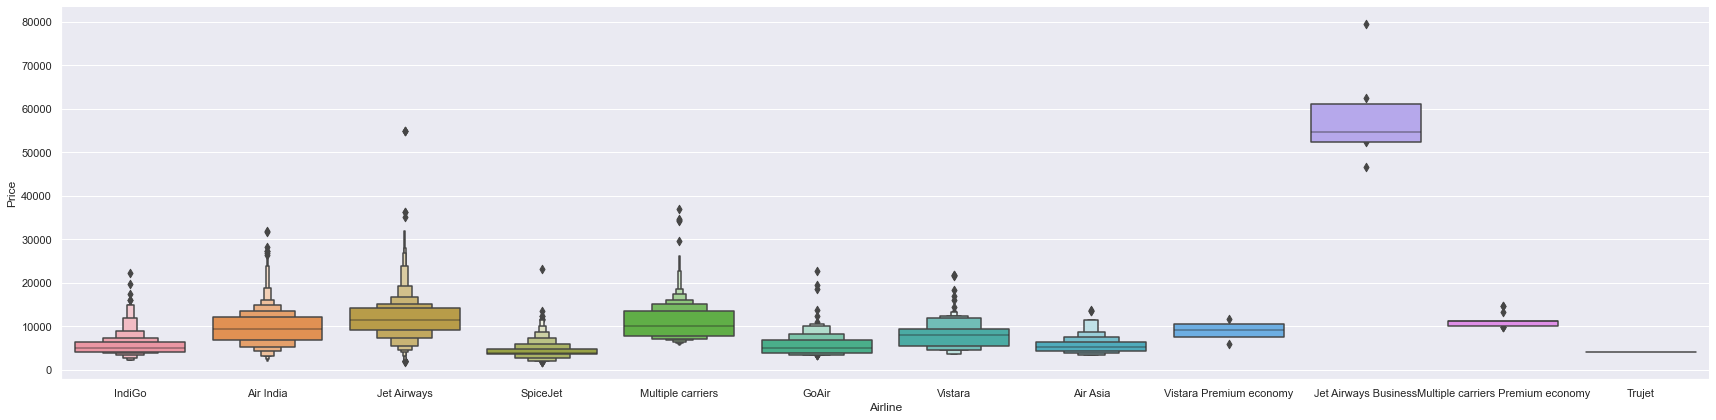

In [24]:
# flights and the distribution of their prices


g = sns.catplot(x="Airline", y="Price", data=df1,kind="boxen", height = 6, aspect = 4)



In [25]:
df1[df1.Price>60000].Airline
# checking the jet airways 

2924    Jet Airways Business
5372    Jet Airways Business
Name: Airline, dtype: object

# Handling Categorical Data 

1. the airline column here is categorical - and the order/rank doesn't matter , hence i am going to do one hot encoding here.
2. Source(place) - also a categorical column
3. Destination is also a categorical column

In [26]:
df1['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [28]:
airlineColumn = df1['Airline']
integerLabelEncoding = LabelEncoder()
integerLabelEncoded = integerLabelEncoding.fit_transform(airlineColumn)
integerLabelEncoded
#will not be using this , because the model may consider this as a ranking parameter 

array([ 3,  1,  4, ...,  4, 10,  1])

In [29]:
Airline = df1['Airline']
Airline = pd.get_dummies(airlineColumn, drop_first=True)
# drop_first=True is important to use, as it helps in reducing the extra
# column created during dummy variable creation. 
# Hence it reduces the correlations created among dummy variables. SOURCE : stackoverflow.com
#len(one_hot_encoded_data.columns) 
Airline.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy'],
      dtype='object')

In [30]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [31]:
#Source = df1.Source
Source = df1[['Source']] # when you use this line, see the column names have 'source' infront of it
Source = pd.get_dummies(Source,drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


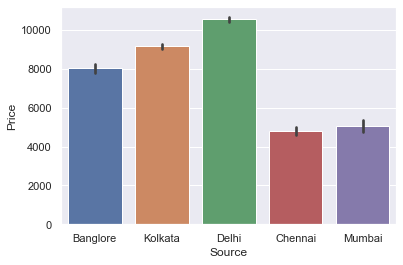

In [32]:
g = sns.barplot(x="Source", y="Price", data=df1)#,kind="boxen", height = 6, aspect = 4)


In [33]:
df1.Destination.unique()


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [34]:
Destination = df1.Destination

Destination = pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [35]:
#lets explore 'Additional_Info'
df1.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [36]:
df1.Additional_Info.value_counts()
# you can see more than 80% of additional info is no info , so its not worth considering

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [37]:
df1['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10677                CCU → BLR
10678                CCU → BLR
10679                BLR → DEL
10680                BLR → DEL
10681    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [38]:
df1.Total_Stops

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10677    non-stop
10678    non-stop
10679    non-stop
10680    non-stop
10681     2 stops
Name: Total_Stops, Length: 10682, dtype: object

### from the above two cells , you can see that , they(Total_Stops,Route) are related 
### so we're gonna remove Route,Additional_Info .
### Route because its related to Total_stops and Additional_Info because 80% of the value is no_info


In [39]:

df1.drop(columns=['Route','Additional_Info'], axis=1, inplace=True)

In [40]:
df1.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Month_of_Journey', 'Day_of_Journey', 'Dep_Hour', 'Dep_Minutes',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [41]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3,16,50,21,35


In [44]:
df1.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

# Important : 
## Take a look at Total_Stops , while thinking about encoding , one hot encoding could be a way to do it, but here lies the important fact , when you have more stops the price is more and when you have less stops/no stops the price is less. Hence it is has to be ORDINAL encoding(Label encoding)
### check out nominal vs ordinal encoding

In [45]:
df1.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [48]:
df1.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)

In [49]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,16,50,21,35


In [50]:
df1.shape

(10682, 12)

In [59]:
data_train = pd.concat([df1,Airline,Source,Destination],axis=1)  #DO NOT FORGET AXIS =1


In [60]:
data_train.shape

(10682, 32)

In [64]:
data_train.drop(["Airline","Source","Destination"],inplace = True,axis = 1) 

In [65]:
data_train.shape

(10682, 29)

In [66]:
data_train.columns

Index(['Duration', 'Total_Stops', 'Price', 'Month_of_Journey',
       'Day_of_Journey', 'Dep_Hour', 'Dep_Minutes', 'Arrival_hour',
       'Arrival_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi'],
      dtype='object')

In [69]:
df2 = pd.read_excel("Test_set.xlsx")

In [71]:
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [72]:
df2.dropna(inplace=True) #inplace true so the dataset itself is modified
df2.index = range(len(df2))
df2.Date_of_Journey = pd.to_datetime(df2.Date_of_Journey)
df2['Month_of_Journey'] = pd.DatetimeIndex(df2['Date_of_Journey']).month
df2['Year_of_Journey'] = pd.DatetimeIndex(df2['Date_of_Journey']).year
df2['Day_of_Journey'] = pd.DatetimeIndex(df2['Date_of_Journey']).day
df2.drop('Year_of_Journey', axis=1, inplace=True)
df2.drop('Date_of_Journey', axis=1, inplace=True)
#extracting the hour from depature time column
df2['Dep_Hour'] = pd.to_datetime(df2.Dep_Time).dt.hour

#extracting the minutes
df2['Dep_Minutes'] = pd.to_datetime(df2.Dep_Time).dt.minute

#now dropping the Dep_Time
df2.drop('Dep_Time', axis=1, inplace=True)
#extracting the hour from depature time
df2['Arrival_hour'] = pd.to_datetime(df2.Arrival_Time).dt.hour

#extracting the minutes
df2['Arrival_min'] = pd.to_datetime(df2.Arrival_Time).dt.minute

#now dropping the Dep_Time
df2.drop('Arrival_Time', axis=1, inplace=True)

In [73]:
df2.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Month_of_Journey', 'Day_of_Journey', 'Dep_Hour',
       'Dep_Minutes', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [75]:
duration = list(df2['Duration'])

for i in range(0,len(duration)):
    duration[i]=  int(eval(duration[i].replace("h", '*60').replace(' ','+').replace('m','*1')))


df2["Duration"] = duration

Airline = df2['Airline']
Airline = pd.get_dummies(airlineColumn, drop_first=True)

Source = df2[['Source']] # when you use this line, see the column names have 'source' infront of it
Source = pd.get_dummies(Source,drop_first=True)

Destination = df2.Destination

Destination = pd.get_dummies(Destination,drop_first=True)

df2.drop(columns=['Route','Additional_Info'], axis=1, inplace=True)

df2.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)
data_test = pd.concat([df2,Airline,Source,Destination],axis=1)

data_test.drop(["Airline","Source","Destination"],inplace = True,axis = 1) 



In [79]:
data_test.columns

Index(['Duration', 'Total_Stops', 'Month_of_Journey', 'Day_of_Journey',
       'Dep_Hour', 'Dep_Minutes', 'Arrival_hour', 'Arrival_min', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

### MODELING 

In [81]:
# will be storing all the columns except 'price' column
X = data_train.loc[:,['Duration', 'Total_Stops', 'Month_of_Journey', 'Day_of_Journey',
       'Dep_Hour', 'Dep_Minutes', 'Arrival_hour', 'Arrival_min', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi']]

In [82]:
X.head()

,Duration,Total_Stops,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minutes,Arrival_hour,Arrival_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,170,0,3,24,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,1,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,1,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [83]:
y = data_train.loc[:,['Price']]
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


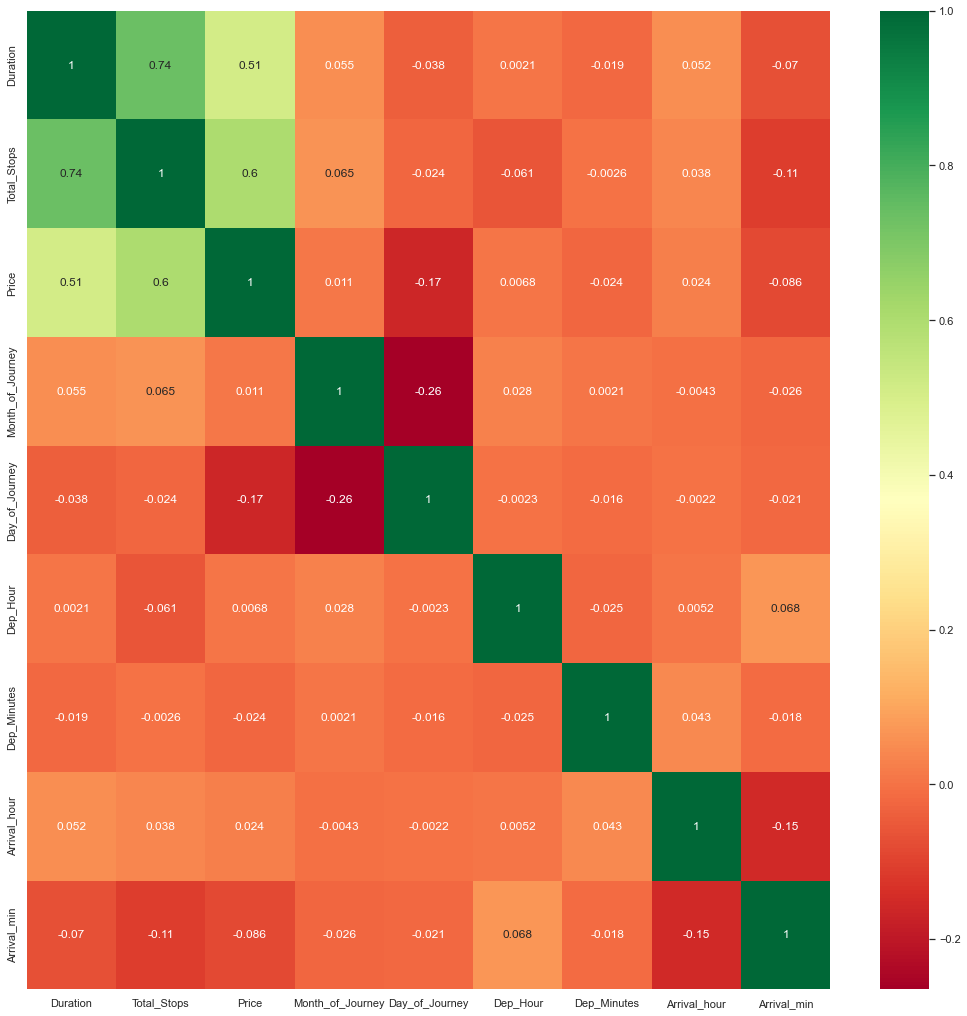

In [88]:
# draw the heat map to view the correlation between X & y (Independent & dependent variables)
plt.figure(figsize = (18,18))
sns.heatmap(df1.corr(), annot = True, cmap="RdYlGn")

plt.show()

In [90]:
X.shape

(10682, 28)

In [91]:
y.shape

(10682, 1)

In [94]:
# using ExtraTreesRegressor to perform feature selection

from sklearn.ensemble import ExtraTreesRegressor
ftSelect = ExtraTreesRegressor()
ftSelect.fit(X,y.Price)

ExtraTreesRegressor()

In [113]:
ftSelect.feature_importances_

array([1.01421221e-01, 2.43108070e-01, 8.39521000e-02, 1.09775749e-01,
       2.76665698e-02, 2.59820249e-02, 3.08940061e-02, 2.43208776e-02,
       1.05092752e-02, 1.96207204e-03, 1.57322127e-02, 1.45906323e-01,
       6.68523342e-02, 2.06511835e-02, 9.81534010e-04, 3.02766860e-03,
       8.60769929e-05, 5.58150166e-03, 1.11742916e-04, 5.99417124e-04,
       1.18845967e-02, 4.34227981e-03, 7.61784249e-03, 1.20665750e-02,
       1.61228740e-02, 5.78555539e-03, 5.95252456e-04, 2.24630635e-02])

In [141]:
imp  = pd.DataFrame(ftSelect.feature_importances_)

In [124]:
imp

,0
0,0.101421
1,0.243108
2,0.083952
3,0.109776
4,0.027667
5,0.025982
6,0.030894
7,0.024321
8,0.010509
9,0.001962


In [129]:
cols = pd.DataFrame(X.columns)
cols

,0
0,Duration
1,Total_Stops
2,Month_of_Journey
3,Day_of_Journey
4,Dep_Hour
5,Dep_Minutes
6,Arrival_hour
7,Arrival_min
8,Air India
9,GoAir


In [165]:
ftImpdf = pd.DataFrame()
ftImpdf['features'] = cols
ftImpdf['importance'] = imp

ftImpdf.sort_values(by='importance',inplace=True)
ftImpdf

,features,importance
16,Trujet,0.000086
18,Vistara Premium economy,0.000112
26,Kolkata,0.000595
19,Source_Chennai,0.000599
14,Multiple carriers Premium economy,0.000982
9,GoAir,0.001962
15,SpiceJet,0.003028
21,Source_Kolkata,0.004342
17,Vistara,0.005582
25,Hyderabad,0.005786


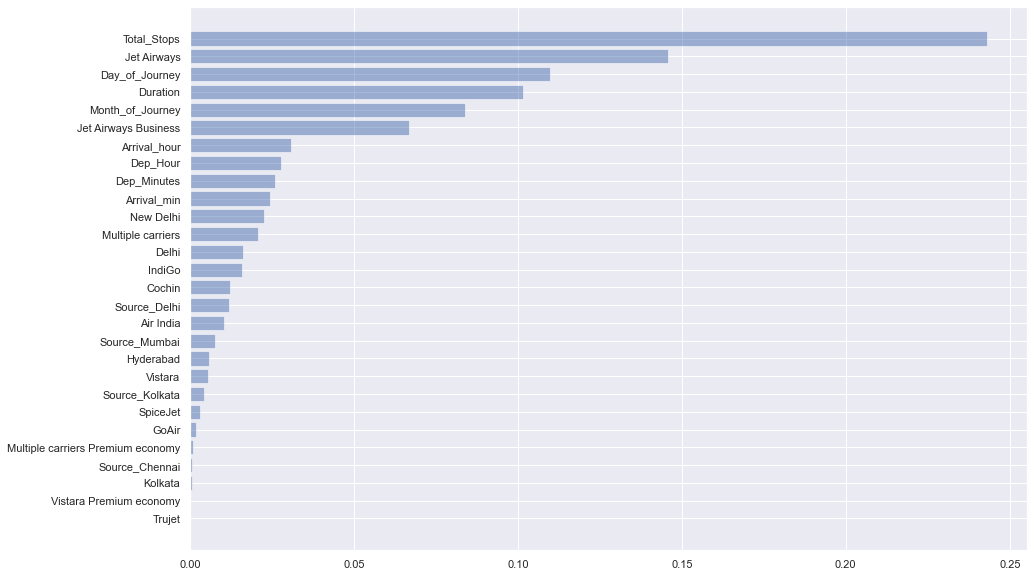

In [166]:
plt.figure(figsize = (15,10))
plt.barh( ftImpdf['features'],ftImpdf['importance'], align='center', alpha=0.5)
#plt.xticks(ftImpdf['features'], ftImpdf['importance'])
#plt.ylabel('Usage')
#plt.title('Programming language usage')
plt.show()

In [167]:
# remember X and y are from data_train

from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

In [169]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressModel = RandomForestRegressor()
RandomForestRegressModel.fit(X_train,y_train)


C:\Users\sandy\AppData\Local\Temp/ipykernel_32344/2496339533.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressModel.fit(X_train,y_train)


RandomForestRegressor()

In [171]:
# r2 score for training data
RandomForestRegressModel.score(X_train,y_train)

0.9521163191534815

In [173]:
# r2 score for testing  data
RandomForestRegressModel.score(X_test,y_test)

0.8153362941106239

In [174]:
y_pred = RandomForestRegressModel.predict(X_test)

In [ ]:
# visualize the predicted and actual values